In [1]:
import numpy  as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import mean_absolute_error
import matplotlib.pyplot as plt
import random

In [2]:
# def compare(fitness_a, fitness_b):
#     # if a dominates b, return will be 1, -1 if the contrary
#     # if there is no dominance, 0 will be returned
#     try:
#         m = (fitness_a[0] - fitness_b[0]) / (fitness_a[1] - fitness_b[1])
#     except ZeroDivisionError:
#         return 0
#     if m > 0:
#         if fitness_a[0] < fitness_b[0]:
#             return 1
#         return -1
#     return 0


In [3]:
def get_parents(parent_F:list, parent_G:list=None, parent_idx:list=None):
	levels  = np.array(parent_F)[:, 2]
	max_idx = np.argmin(levels)

	if parent_G is not None:
		return parent_G[max_idx]
	if parent_idx is not None:
		return parent_idx[max_idx]
	return max_idx

In [4]:
def mix_parents(parent_a:list, parent_b:list, ratio:float = 0.5, get_indexes:bool=False):
	genotype_len = len(parent_a)

	a_idxs = set()
	acum = 0
	for i in range(genotype_len):
		acum += ratio
		if acum >= 1:
			acum -= 1
			a_idxs.add(i)
	b_idxs = {i for i in range(genotype_len)} - a_idxs

	a_idxs = list(a_idxs)
	b_idxs = list(b_idxs)
	child  = np.zeros((genotype_len), bool)

	child[a_idxs] = parent_a[a_idxs].copy()
	child[b_idxs] = parent_b[b_idxs].copy()
	if get_indexes:
		return child, (a_idxs, b_idxs)
	return child

In [5]:
def NSGA2(fitness):
    n = len(fitness)
    levels = np.zeros(n)
    dominates = [[] for _ in range(n)]
    is_dominated_by = {}
    for i in range(n):
        is_dominated_by[i] = 0
    for idx_first_point, first_point in enumerate(fitness):
        for idx_second_point in range(idx_first_point+1, len(fitness)):
            second_point = fitness[idx_second_point]
            m = compare(first_point, second_point)
            if m == 1: #first_point dominates
                is_dominated_by[idx_second_point] = is_dominated_by.get(idx_second_point, 0) + 1
                dominates[idx_first_point].append(idx_second_point)
            elif m == -1:
                is_dominated_by[idx_first_point] = is_dominated_by.get(idx_first_point, 0) + 1
                dominates[idx_second_point].append(idx_first_point)
        
    #sorted_dict = dict(sorted(my_dict.items(), key=lambda item: item[1]))

    curr_level = 0
    while len(is_dominated_by) > 0:
  
        non_dominated_indices = [idx for idx, dominance_count in is_dominated_by.items() if dominance_count == 0]
        for idx in non_dominated_indices:
            
            for dominated_idx in dominates[idx]:
                is_dominated_by[dominated_idx] -= 1
                
            levels[idx] = curr_level
            del is_dominated_by[idx]
        curr_level+=1
        
    return levels
    

In [6]:
def get_fitness():
    ...

# Initial population

In [7]:
def solve(self, p_size, pCrossover, pMutation):
    #read csv
    filename = 'wine.csv'  
    df = pd.read_csv(filename)
    num_features = df.shape[1] -1
    
    #generate p0
    p0 = np.random.randint(2, size=(self.p_size, num_features))
    print(p0)
    print(p0[1][0],p0[1][1])


In [8]:
class Problem:
	def generate_initial_population(self, p_size) -> list:...
	def compare(self, fitness_a, fitness_b):...

	def get_parent(self, parent_F:list, parent_G:list=None, parent_idx:list=None):...
	def mix_parents(self, parent_a, parent_b, ratio:float=0.5):...
	def mutate(self, g):...
	def check_individual_integrity(self, g) -> bool:...

	def get_fitness(self, G:list, F:list=None):...
	def get_elite(self, G:list, F:list) -> (list, list):...
	def deep_copy(self, G, population:bool=True):...
	def update_elite(self, E, newE, Fe, newFe):...

	def solved(self, Fe:list):...
	def has_progress_metric(self) -> bool:...
	def get_progress_metric(self, F:list) -> float:...
	def get_progress_max(self) -> float:...
	def get_variation(self, F:list) -> float:...
	def custom_print(self, G:list, F:list):...

In [9]:
from time import sleep

class mock_solver(Problem):
	def __init__(self):
		self.mutations = 0
		self.crosses   = 0
		self.updates   = 0
		self.p_size    = 1
		self.rng       = np.random.default_rng()

	def generate_initial_population(self, p_size) -> list:
		self.p_size = p_size
		return [None for i in range(p_size)]

	def compare(self, fitness_a, fitness_b):
		...

	def get_parent(self, parent_F:list, parent_G:list=None, parent_idx:list=None):
		return 0

	def mix_parents(self, parent_a, parent_b, ratio:float=0.5):
		self.crosses   += 1
	def mutate(self, g):
		self.mutations += 1
	def check_individual_integrity(self, g) -> bool:
		return False

	def get_fitness(self, G:list, F:list=None):
		if F is None:
			return [0 for i in range(len(G))]

	def get_elite(self, G:list, F:list) -> (list, list):
		return ([], [])

	def update_elite(self, E, newE, Fe, newFe):
		return ([], 0)

	def solved(self, Fe:list):
		return False

	def deep_copy(self, G, population:bool=True):
		if population:
			self.updates += 1
			sleep(0.01)
			return [None for i in enumerate(G)]
		return None

	def has_progress_metric(self) -> bool:
		return True
	def get_progress_metric(self, F:list) -> float:
		return 0.5
	def get_progress_max(self) -> float:
		return 1
	def get_variation(self, F:list) -> float:
		return self.rng.random()

	def __str__(self):
		mut_ratio   = self.mutations / (self.updates * self.p_size)
		cross_ratio = self.crosses   / (self.updates * self.p_size)

		ret_string  = f'Mock test of {self.updates} iterations '
		ret_string += f'has a {mut_ratio:.2f} mutation and {cross_ratio:.2f} cross ratio'

		return ret_string

In [10]:
class Genetic_solver:
	def __init__(self
		,problem:Problem
		,p_size:int       = 50
		,max_it:int       = 1000
		,pCross:float     = 0.5
		,pMut:float       = 0.5
		,rng              = None
		# Formatting options for progress bar
		,FEEDBACK_INT:int = 10
		,MAX_F_LEN:int    = 30
		,MAX_K_LEN:int    = 20
		,SPINNER:list[str]= ['\\', '|', '/', '-']
		,verbose:bool     = False
		,use_custom_print:bool= False
	):
		self.problem      = problem
		self.p_size       = p_size
		self.max_it       = max_it
		self.pCross       = pCross
		self.pMut         = pMut
		self.rng          = rng
		if rng is None:
			self.rng = np.random.default_rng()
		# Formatting options for progress bar
		self.FEEDBACK_INT = FEEDBACK_INT
		self.MAX_F_LEN    = MAX_F_LEN
		self.MAX_K_LEN    = MAX_K_LEN
		self.SPINNER      = SPINNER
		self.SPINNER_LEN  = len(self.SPINNER)
		self.verbose      = verbose
		self.use_custom_print= use_custom_print

		# solve() variables
		self.G    = None
		self.F    = None

		self.newG = None
		self.newF = None

		self.elite = None
		self.Fe    = None

		self.invalid = 0
	
	def _print_progress(self, n_k:int):
		if not self.verbose:
			spinner_idx:int = int(n_k/self.FEEDBACK_INT)%self.SPINNER_LEN
			k_percentage    = n_k/float(self.max_it)*100
			filled_k = int(self.MAX_K_LEN *n_k // self.max_it)

			k_bar = '#'*filled_k + '-'*(self.MAX_K_LEN - filled_k)
			
			print(f'\r{self.SPINNER[spinner_idx]}', end='')
			print(f' Iteration:[{k_bar}]{k_percentage:.2f}%', end=' ')

			if self.problem.has_progress_metric():
				progress = self.problem.get_progress_metric(self.Fe)
				filled_p = int(self.MAX_F_LEN * progress // self.problem.get_progress_max())
				p_bar = '#'*filled_p + '-'*(self.MAX_F_LEN - filled_p)
				variation = self.problem.get_variation(self.F)

				print(f'Fitness:[{p_bar}]pm {variation:.2f}', end='')
			#----------
		else:
			print(f'Iteration: {n_k}/{self.max_it}')
			if self.use_custom_print:
				self.problem.custom_print(self.G, self.Fe)
			else:
				print(f'///Fitness///')
				print(np.array(self.F))
				print(f'///Elite///')
				print(np.array(self.Fe))
		

	def solve(self):
		self.G    = self.problem.generate_initial_population(self.p_size)
		self.newG = [None for i in range(self.p_size)]
		self.F    = self.problem.get_fitness(self.G)

		self.elite, self.Fe = self.problem.get_elite(self.G, self.F)

		for k in range(1, self.max_it +1):
			if self.problem.solved(self.Fe):
				self._print_progress(k)
				break

			for i, gntype in enumerate(self.G):
				gntype_cpy = self.problem.deep_copy(gntype, population=False)
				if self.rng.random() < self.pCross:
					parenta_idx = self.problem.get_parent(self.F)
					parentb_idx = self.problem.get_parent(self.F)

					self.newG[i] = self.problem.mix_parents(self.G[parenta_idx], self.G[parentb_idx])
				else:
					self.newG[i] = self.problem.deep_copy(gntype, population=False)

				if self.rng.random() < self.pMut:
					self.newG[i] = self.problem.mutate(gntype)
				if not self.problem.check_individual_integrity(self.newG[i]):
					self.invalid += 1
					self.newG[i] = gntype_cpy
			#-----------
			
			Fi = self.problem.get_fitness(self.newG)

			elite_i, Fe_i       = self.problem.get_elite(self.newG, Fi)
			
			self.elite, self.Fe = self.problem.update_elite(self.elite, elite_i, self.Fe, Fe_i)

			self.G = self.problem.deep_copy(self.newG)
			self.F = self.problem.get_fitness(self.G)

			if k%self.FEEDBACK_INT == 1 or k==self.max_it:
				self._print_progress(k)
				
		#-------------
		print(' Ok!')
		return self.elite

probem = mock_solver()
solver  = Genetic_solver(probem)

result = solver.solve()
print(probem)
print(solver.invalid)

\ Iteration:[####################]100.00% Fitness:[###############---------------]pm 0.84 Ok!
Mock test of 1000 iterations has a 0.50 mutation and 0.50 cross ratio
50000


# test functions

In [11]:
# solve(10,0.5,0.5)

In [12]:
def test_NSGA():
    fitn = [
        [1,2],
        [5,3],
        [6,5],
        [4,2],
        [2,4],
        [3.88,4.14],
        [3,3],
        [2,1]    
    ]

    levels = NSGA2(fitn)
    print(levels)

# Main

In [19]:
class Feature_selection(Problem):
	def __init__(self, filename:str, model=LinearRegression):
		self.filename       = filename
		self.df             = pd.read_csv(filename)
		self.num_features   = self.df.shape[1] -1
		self.features_names = self.df.columns[:-1]
		self.target_name    = self.df.columns[-1]

		self.model = model

	def generate_initial_population(self, p_size) -> list:
		G = np.random.choice([False, True], size=(p_size, self.num_features))
		G[0] = np.full((1, self.num_features), True) # 1 with all features
		return G

	def compare(self, fitness_a, fitness_b):
		# if a dominates b, return will be 1, -1 if the contrary
		# if there is no dominance, 0 will be returned
		if fitness_a[1] - fitness_b[1] == 0.0:
			if fitness_a[0] < fitness_b[0]:
				return 1
			return -1
		try:
			m = (fitness_a[0] - fitness_b[0]) / (fitness_a[1] - fitness_b[1])
		except ZeroDivisionError:
			return 0
		if m > 0:
			if fitness_a[0] < fitness_b[0]:
				return 1
			return -1
		return 0

	def get_parent(self, parent_F:list, parent_G:list=None, parent_idx:list=None):
		n = len(parent_F)  # Assuming n is the length of the parent_F list
		parent_candidates_idx = np.random.randint(0, n, 2)
		min_value = float('inf')
		min_index = None
		
		for idx in parent_candidates_idx:
			if parent_F[idx][2] < min_value:
				min_value = parent_F[idx][2]
				min_index = idx
		
		return min_index

	def mix_parents(self, parent_a, parent_b, ratio:float=0.5, get_indexes=False):
		genotype_len = len(parent_a)

		a_idxs = set()
		acum = 0
		for i in range(genotype_len):
			acum += ratio
			if acum >= 1:
				acum -= 1
				a_idxs.add(i)
		b_idxs = {i for i in range(genotype_len)} - a_idxs

		a_idxs = list(a_idxs)
		b_idxs = list(b_idxs)
		child  = np.zeros((genotype_len), bool)

		child[a_idxs] = parent_a[a_idxs].copy()
		child[b_idxs] = parent_b[b_idxs].copy()
		if get_indexes:
			return child, (a_idxs, b_idxs)
		return child

	def mutate(self, g):
		gen = g.copy()
		rand = random.randint(0, len(gen) - 1)
		gen[rand] = not gen[rand]
		return gen
	def check_individual_integrity(self, g) -> bool:
		n_features = np.count_nonzero(g)
		return n_features > 0

	def NSGA2(self, fitness):
		n = len(fitness)
		levels = np.zeros(n)
		dominates = [[] for _ in range(n)]
		#dd =  [[] for _ in range(n)]
		is_dominated_by = {}
		for i in range(n):
			is_dominated_by[i] = 0
		for idx_first_point, first_point in enumerate(fitness):
			for idx_second_point in range(idx_first_point+1, len(fitness)):
				second_point = fitness[idx_second_point]
				m = self.compare(first_point, second_point)
				if m == 1: #first_point dominates
					is_dominated_by[idx_second_point] +=1
					dominates[idx_first_point].append(idx_second_point)
					#dd[idx_second_point].append(idx_first_point)
				elif m == -1:
					is_dominated_by[idx_first_point] +=1
					dominates[idx_second_point].append(idx_first_point)
					#dd[idx_first_point].append(idx_second_point)
		#for bbb,pp in enumerate(dd):
			#   print(bbb,pp)

		curr_level = 0
		while len(is_dominated_by) > 0:
			non_dominated_indices = [idx for idx, dominance_count in is_dominated_by.items() if dominance_count == 0]

			for idx in non_dominated_indices:
				for dominated_idx in dominates[idx]:
					is_dominated_by[dominated_idx] -= 1

				levels[idx] = curr_level
				del is_dominated_by[idx]
			curr_level+=1
				
		return levels
		
	def get_fitness(self, G:list, F:list=None):
		fitness = []
		for gi in G:
			selected_features = self.features_names[gi]

			# Prepare the data
			X = self.df[selected_features]
			y = self.df[self.target_name]

			# Split the data into training and testing sets
			X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

			# Initialize and train the linear regression model
			model = self.model()
			model.fit(X_train, y_train)

			# Make predictions
			y_pred = model.predict(X_test)

			# Metrics
			mae = mean_absolute_error(y_test, y_pred)
			n_features_used = np.count_nonzero(gi)
			fitness.append([mae,n_features_used])
		
		levels = self.NSGA2(fitness)
		fitness_w_levels = [point + [lvl] for point, lvl in zip(fitness, levels)]
		
		#for fidx,fitn in enumerate(fitness_w_levels):
		#    print(fidx,": ",fitn)
		#print("levels:",levels)
		#graphicate_points(fitness)
		return fitness_w_levels

	def update_elite(self, E, newE, Fe, newFe):
		new_elite_fitness = []
		new_elite_string = []
		for idx, e in enumerate(Fe):
			new_elite_fitness.append(e.copy())
			new_elite_string.append(E[idx].copy())
		for idx, e in enumerate(newFe):
			new_elite_fitness.append(e.copy())
			new_elite_string.append(newE[idx].copy())
		
		levels = self.NSGA2(new_elite_fitness)
		
		for idx, e in enumerate(new_elite_fitness):
			e[2] = levels[idx]
		return self.get_elite(new_elite_string, new_elite_fitness)

	def get_elite(self, G:list, F:list) -> (list, list):
		elites_fitness = []
		elites_string = []
		for idx, fitn in enumerate(F):
			if fitn[2]==0:
				elites_fitness.append(fitn.copy())
				elites_string.append(G[idx].copy())
		return elites_string, elites_fitness

	def deep_copy(self, G, population:bool=True):
		if population:
			return [g.copy() for g in G]
		else:
			return G.copy()
	def is_elite_list(self) -> bool:
		return True

	def solved(self, Fe:list):
		return False
	def has_progress_metric(self) -> bool:
		return True
	def get_progress_metric(self, F:list) -> float:
		diag      = [1, 1]
		diag_norm = np.linalg.norm(diag)
		slope = [np.dot(f[:-1], diag) / (np.linalg.norm(f[:-1])*diag_norm)  for f in F]
		return 1 - np.min(slope)
	def get_progress_max(self) -> float:
		return 1
	def get_variation(self, F:list) -> float:
		diag      = [1, 1]
		diag_norm = np.linalg.norm(diag)
		slope = [np.dot(f[:-1], diag) / (np.linalg.norm(f[:-1])*diag_norm)  for f in F]
		return np.std(slope)
	def custom_print(self, G:list, F:list):
		# Set smaller figure size
		plt.figure(figsize=(5, 5))  # Adjust the width and height as needed

		# Plot the points
		for i, point in enumerate(F):
				plt.scatter(point[0], point[1], color='blue', s=50)  # Reduced marker size
				plt.text(point[0], point[1], str(i), fontsize=8, ha='center', va='bottom')

		plt.xlabel('X-axis')
		plt.ylabel('Y-axis')
		plt.title('Plot')

		# Set axis limits
		plt.xlim(0.4, 1)
		plt.ylim(0, 12)

		# Add grid
		plt.grid(True)
		plt.tight_layout()  # Ensure proper spacing
		plt.show()

Iteration: 1/20


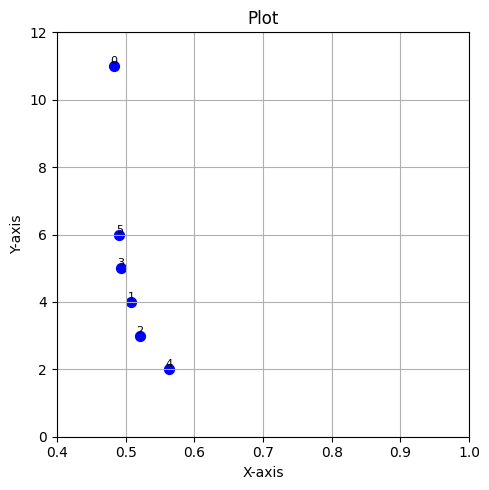

Iteration: 4/20


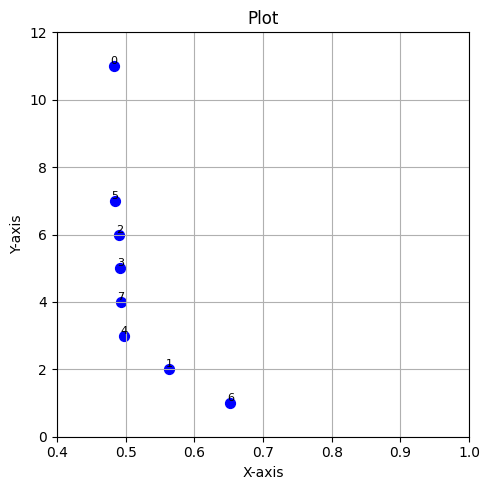

Iteration: 7/20


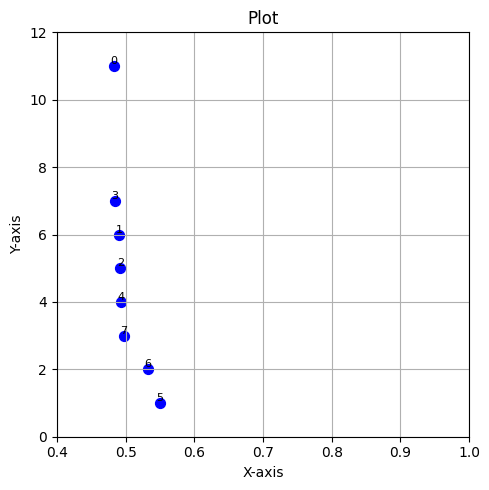

Iteration: 10/20


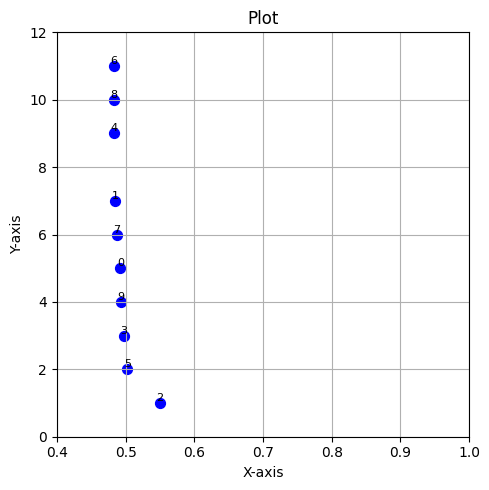

Iteration: 13/20


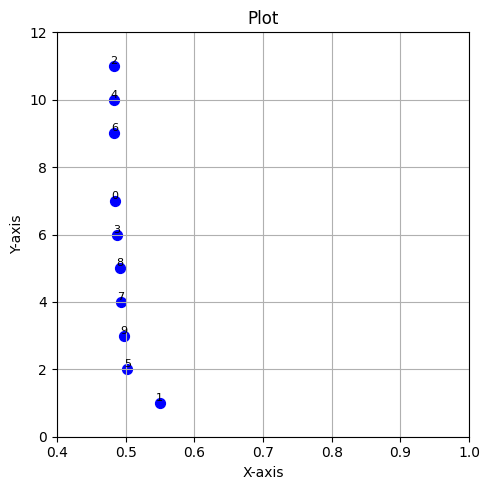

Iteration: 16/20


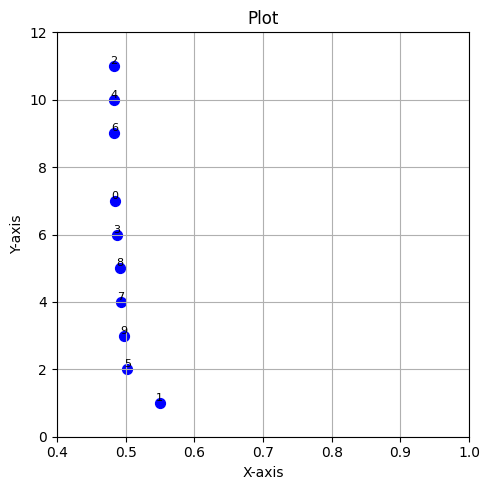

Iteration: 19/20


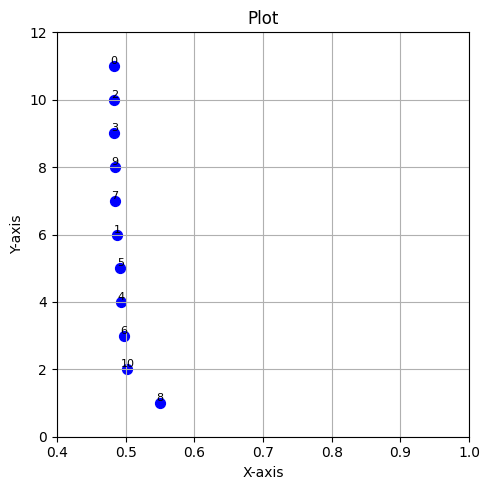

Iteration: 20/20


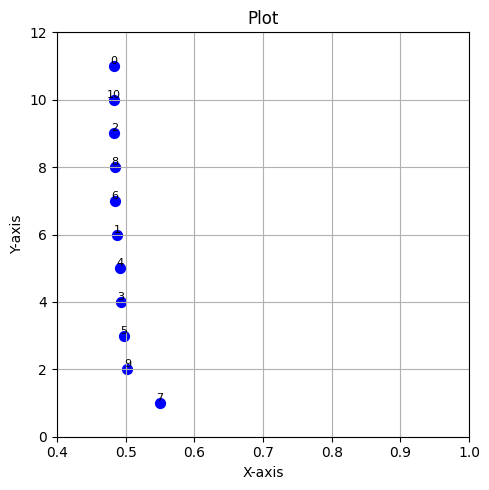

 Ok!


In [20]:
# import warnings
# warnings.simplefilter(action='ignore', category=RuntimeWarning)

fs_problem = Feature_selection('wine.csv')
solver     = Genetic_solver(fs_problem, max_it=20, FEEDBACK_INT=3, verbose=True, use_custom_print=True)
result     = solver.solve()
# print(np.array(solver.Fe))

(11, 3)


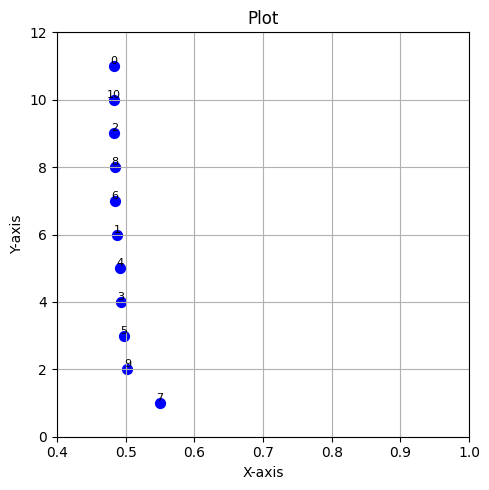

In [21]:
print(np.array(solver.Fe).shape)
fs_problem.custom_print(None, solver.Fe)